In [2]:
import Data_Conversion
import Input_Parameters 
import Passive_Model
import Solar_Generation
import Electrical_Load

import Simulate
import Baseline_CO
import SO
import RO

import numpy as np
import pandas as pd
import os
from pathlib import Path

In [8]:
# Define the base data directory, list of locations, and the weather year.
data_dir = "Data"
locations = ["California", "Arizona", "Alaska", "Minnesota", "Florida"]
# locations = ["California"]
scenarios = ["FOB", "DC", "RC"]

# Define which columns to sum and which to average
cols = ['pv', 'E_Load', 'Cooling_Load', 'Heating_Load']  # Columns to sum daily

# 20 years of training data
weather_year_list = list(range(1998, 2023))  # The upper bound in range() is exclusive

# Set a random seed for consistency
# Define the number of rows (i) and columns (j)

j = len(weather_year_list)  # Number of columns


# The base case should always be the first row of the random seed matrix, for sensitivity analysis on locations, scenarios, and capacity costs.

# Get the list of latitude, longitude, and timezones for all locations
lats, lons, timezones = Data_Conversion.get_timezones(data_dir, locations)

# Create the nested dictionary to store all input data
nested_dict = {location: {year: {} for year in weather_year_list} for location in locations}

output_dict = {location: {year: {} for year in weather_year_list} for location in locations}

# Define folder name
folder_name = "Yearly_Results"
# Create folder if it doesn't already exist
os.makedirs(folder_name, exist_ok=True)
        
location = "Alaska"
year = 1998

# Read NSRDB weather data of the given location of the given year
# NSRDB_raw_weather = Data_Conversion.read_NSRDB(data_dir, location, year).head(24)
NSRDB_raw_weather = Data_Conversion.read_NSRDB(data_dir, location, year)

# Prepare weather data file using NSRDB data
weather_data = Data_Conversion.prepare_NSRDB(NSRDB_raw_weather, lats[2], lons[2], timezones[2])

# Prepare solar PV capacity factor using weather data
pv_cf = Solar_Generation.generate_pv(weather_data, lats[2])




Reading file for California: Data\NREL_NSRDB_California\137344_37.49_-122.42_1998.csv
Reading file for Arizona: Data\NREL_NSRDB_Arizona\323705_33.45_-112.06_1998.csv
Reading file for Alaska: Data\NREL_NSRDB_Alaska\34776_59.25_-154.62_1998.csv
Reading file for Minnesota: Data\NREL_NSRDB_Minnesota\777900_44.97_-93.26_1998.csv
Reading file for Florida: Data\NREL_NSRDB_Florida\1060499_25.77_-80.18_1998.csv
Reading file for Alaska: Data\NREL_NSRDB_Alaska\34776_59.25_-154.62_1998.csv


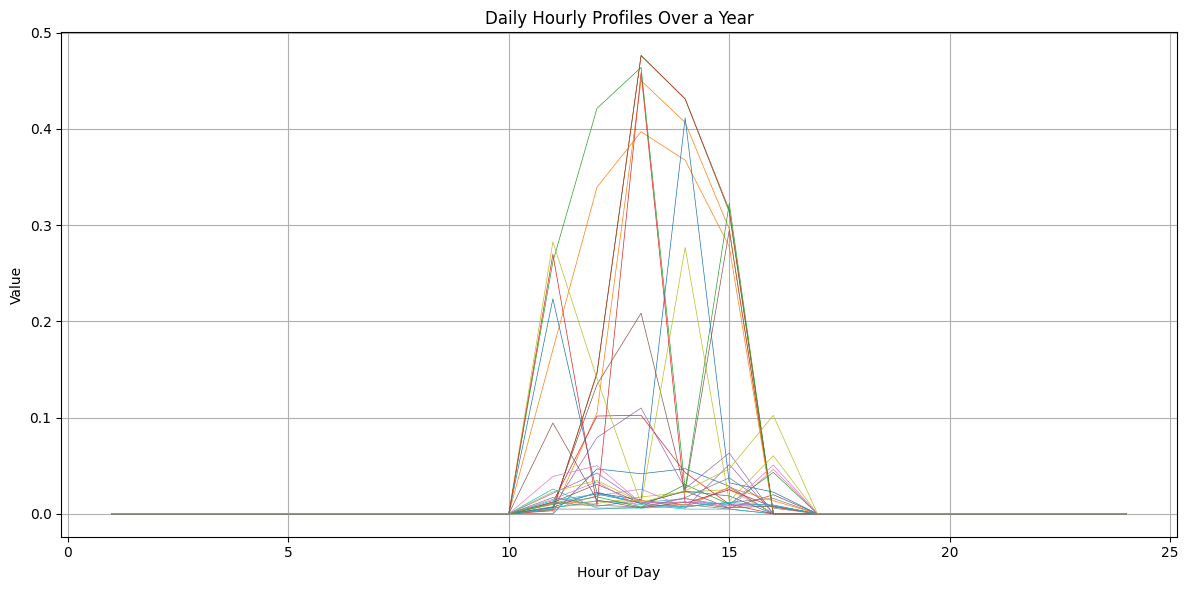

In [11]:
import matplotlib.pyplot as plt

reshaped = pv_cf.reshape((365, 24))
df = pd.DataFrame(reshaped, columns=[f'{i}' for i in range(24)])

# Plot
plt.figure(figsize=(12, 6))

days = range(0, 30)
for day in days:
    plt.plot(df.columns.astype(int)+1, df.iloc[day], alpha=1, linewidth=0.5)

plt.xlabel('Hour of Day')
plt.ylabel('Value')
plt.title('Daily Hourly Profiles Over a Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
print(df)

       0    1    2    3    4    5    6         7         8         9  ...  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.050891  0.365765  0.554243  ...   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.002834  0.038164  0.110840  ...   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.005721  0.263599  0.273703  ...   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.001864  0.021350  0.060080  ...   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.005745  0.363043  0.571399  ...   
..   ...  ...  ...  ...  ...  ...  ...       ...       ...       ...  ...   
360  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.002826  0.081730  0.317610  ...   
361  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.009448  0.031649  0.128585  ...   
362  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.002851  0.123357  0.124193  ...   
363  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.003811  0.343656  0.555928  ...   
364  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.013430  0.387524  0.597630  ...   

           14        15        16   17   18   19   20   21   22   23  
0   